In [1]:
import numpy as np
from collections import Counter #Just use Counter to count number
from csv import reader
import random
import matplotlib.pyplot as plt

# a.load data & split data to dev test

In [55]:
def loadDataset(filename,split):
    devSet=[]
    testSet = []
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        dataset = list(csv_reader)
        for x in range(len(dataset)-1):  
            for y in range(4):  
                dataset[x][y] = float(dataset[x][y])  
            if random.random()<split:  
                devSet.append(dataset[x])  
            else:  
                testSet.append(dataset[x])
    y_dev = np.array([xx.pop(-1) for xx in devSet])
    x_dev = np.array(devSet)
    y_test = np.array([xx.pop(-1) for xx in testSet])
    x_test = np.array(testSet)
    return x_dev,x_test,y_dev,y_test

filename = "iris.data"
split = 0.67
x_dev,x_test,y_dev,y_test=loadDataset(filename, split)
print("Dev set" + repr(len(x_dev)))  
print("Test set"+ repr(len(x_test)))
print(x_dev)  
print(y_dev)
print(x_test)  
print(y_test)

Dev set102
Test set48
[[4.9 3.  1.4 0.2]
 [4.6 3.1 1.5 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.8 3.  1.4 0.1]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.2 3.5 1.5 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.9 3.1 4.9 1.5]
 [6.5 2.8 4.6 1.5]
 [5.7 2.8 4.5 1.3]
 [6.3 3.3 4.7 1.6]
 [6.6 2.9 4.6 1.3]
 [5.  2.  3.5 1. ]
 [5.9 3.  4.2 1.5]
 [6.  2.2 4.  1. ]
 [6.1 2.9 4.7 1.4]
 [6.7 3.1 4.4 1.4]
 [5.6 3.  4.5 1.5]
 [5.8 2.7 4.1 1. ]
 [6.2 2.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.1 2.8 4.  1.3]
 [6.3 2.5 4.9 1.5]
 [6.1 2.8 4.7 1.2]
 [6.4 2.9 4.3 1.3]
 [6.7 3. 

# b.implement kNN using the following hyperparameters

## distance metric function

### euclidean distance

In [56]:
def calculateEuclideanDistance(one_x_test,x_dev):
    one_x_test = one_x_test.reshape(1,-1)
    x_dev = x_dev.reshape(x_dev.shape[0],-1)
    x_test = np.tile(one_x_test,(x_dev.shape[0],1))
    distance = np.sqrt(np.power(x_test - x_dev,2).sum(axis=1))
    return distance

### normalized euclidean distance

In [57]:
def calculateNormalizedEuclideanDistance(one_x_test,x_dev):
    x_standard = np.std(x_dev, axis=0)
    x_standard = x_standard.reshape(1,-1)
    one_x_test = one_x_test.reshape(1,-1)
    x_dev = x_dev.reshape(x_dev.shape[0],-1)
    x_test = np.tile(one_x_test,(x_dev.shape[0],1))
    x_std = np.tile(x_standard,(x_dev.shape[0],1))
    distance = np.sqrt(np.power((x_test - x_dev)/x_std,2).sum(axis=1))   
    return distance

### cosine similarity

In [58]:
def calculateCosineSimilarity(one_x_test,x_dev):
    distance_arr = []
    for x in x_dev:
        distance = 1- np.dot(one_x_test,x)/(np.linalg.norm(one_x_test)*(np.linalg.norm(x)))
        distance_arr.append(distance)
    return distance_arr

In [59]:
for one_x_test in x_dev:
    distance = calculateEuclideanDistance(one_x_test,x_dev)
    print(distance)
    distance2 = calculateCosineSimilarity(one_x_test,x_dev)
    print(distance2)
    distance3 = calculateNormalizedEuclideanDistance(one_x_test,x_dev)
    print(distance3)
    break

[0.         0.33166248 1.09087121 0.50990195 0.42426407 0.50990195
 0.14142136 1.62788206 1.05356538 0.54772256 1.17473401 0.83666003
 0.76157731 0.78102497 0.55677644 0.64807407 0.2236068  0.59160798
 0.34641016 0.24494897 0.678233   0.3        0.78740079 0.17320508
 0.50990195 0.45825757 0.54772256 0.678233   0.14142136 0.84852814
 0.81240384 0.31622777 4.09633983 4.23674403 3.81182371 3.39116499
 3.86005181 3.78813938 2.46170673 3.24499615 3.04138127 3.71214224
 3.7        3.43365694 2.97153159 3.69188299 3.89358447 3.07408523
 4.01870626 3.65650106 3.44673759 4.29534632 2.7        2.57875939
 2.85482048 4.11703777 3.39852909 2.99833287 3.62215406 2.95465734
 2.17944947 3.07896086 3.1144823  3.36452077 1.91311265 3.02985148
 5.35723809 4.70850295 5.09116882 6.15954544 3.47994253 5.68682688
 5.04083326 5.74717322 4.41927596 4.90204039 4.13400532 4.40227214
 4.68294779 6.36945838 6.53146232 4.0620192  5.19037571 4.10609303
 5.38980519 4.85180379 5.15848815 5.59195851 6.15467302 4.8918

## Implement KNN

In [60]:
def getKNeighborLabels(distances,y_dev,k):
    neighbor_label = []
    for dis in np.sort(distances)[:k]:
        label = y_dev[distances==dis]
        neighbor_label.extend(label)
    return np.array(neighbor_label).reshape(-1, )

def getKNearestNeighbor(one_x_test,x_dev,y_dev,k):
    distances = getDistance(one_x_test,x_dev,distanceMetric)
    y_dev = y_dev.reshape(y_dev.shape[0],1)
    neighbor_labels = getKNeighborLabels(distances,y_dev,k)
    nn_label,nn_count = 0,0
    for label,count in Counter(neighbor_labels).items():
        if count > nn_count:
            nn_count = count
            nn_label = label
    return nn_label

## predict & accuracy

In [61]:
def predict(x_test,x_dev,y_dev,k):
    y_pred = []
    for x in x_test:
        label = getKNearestNeighbor(x,x_dev,y_dev,k)
        y_pred.append(label)
    return np.array(y_pred)

def getAccuracy(y_test,y_pred):
    y_test=y_test.reshape(y_test.shape[0],-1)
    y_pred=y_pred.reshape(y_pred.shape[0],-1)
    return np.sum(y_test==y_pred)/len(y_test)

## Calculate the accuracy of each value according to the value list of k & Draw charts

In [62]:
def getAccuracyByK(x_dev,x_test,y_dev,y_test,k_arr):
    accuracy=[]
    k_best,acc_best = 0, 0
    for k in k_arr:
        y_pred = predict(x_test,x_dev,y_dev,k)
        acc = getAccuracy(y_test,y_pred)
        if acc > acc_best:
            k_best = k
            acc_best = acc
        accuracy.append(acc)
    return accuracy,k_best,acc_best

def plotAccuracy(acc_best,k_arr,accuracy,distanceMetric):
    figure = plt.figure(figsize=(8,6))
    ax = figure.add_subplot(1,1,1)
#    ax.plot(k_arr,accuracy,color='blue',marker='o',lw=1)

    
    plt.xticks(k_arr, rotation=0)
    ax.set_ylim(np.min(accuracy)-0.01,acc_best+0.01)
    ax.bar(k_arr,accuracy)
    for a,b in zip(k_arr,accuracy):
        plt.text(a,b,'%.5f'%b, ha = 'center',va = 'bottom',fontsize=8)
    ax.set_xlabel(r"k_value")
    ax.set_ylabel(r"accuracy")
    ax.set_title("k value and accuracy by using " + distanceMetric)
    plt.show()

# c.Using the development dataset

In [63]:
def getDistance(one_x_test,x_dev,distanceMetric):
    if distanceMetric == "euclidean distance" :
        return calculateEuclideanDistance(one_x_test,x_dev)
    if distanceMetric == "normalized euclidean distance" :
        return calculateNormalizedEuclideanDistance(one_x_test,x_dev)
    if distanceMetric == "cosine similarity" :
        return calculateCosineSimilarity(one_x_test,x_dev)

## Calculate accuracy by iterating all of the development data point number of neighbor K(1,3,5,7) 

### Using euclidean distance

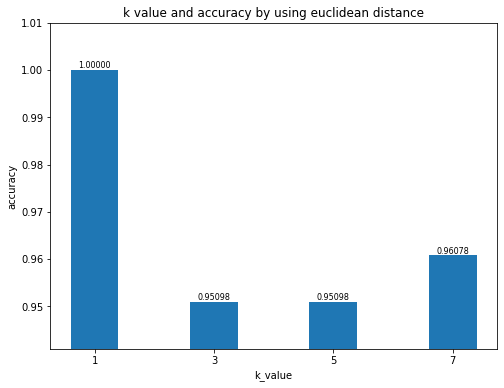

In [64]:
distanceMetric = "euclidean distance"
k_arr = [1,3,5,7]
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

### Using normalized euclidean distance

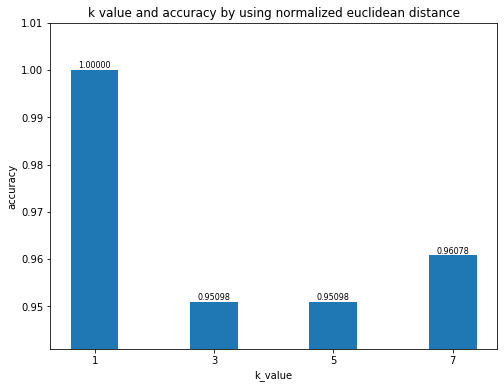

In [67]:
distanceMetric = "normalized euclidean distance"
k_arr = [1,3,5,7]
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

### Using cosine similarity

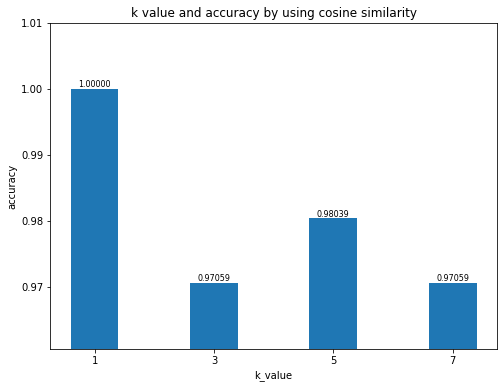

In [68]:
distanceMetric = "cosine similarity"
k_arr = [1,3,5,7]
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

## Find optimal hyperparameters k no limit
## Beacuse using development data to test, the accuracy of k=1 and k=2 must be100%.So it doesn't make sense,  remove these two values here.And because data sours each class have 50 row. So using 3-25 as k.

When using euclidean distanceoptimal hyperparameters k is 4


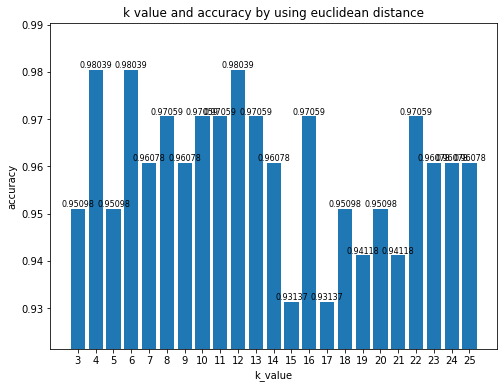

In [69]:
distanceMetric = "euclidean distance"
k_arr = np.arange(3,26,1).tolist()
ed_accuracy,ed_k_best,ed_acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
print("When using " + distanceMetric + "optimal hyperparameters k is " + str(ed_k_best))
plotAccuracy(ed_acc_best,k_arr,ed_accuracy,distanceMetric)

When using normalized euclidean distanceoptimal hyperparameters k is 4


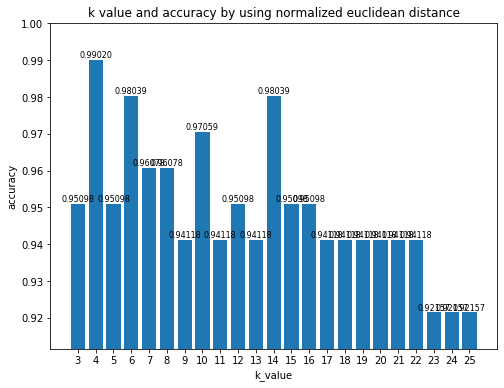

In [70]:
distanceMetric = "normalized euclidean distance"
k_arr = np.arange(3,26,1).tolist()
ned_accuracy,ned_k_best,ned_acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
print("When using " + distanceMetric + "optimal hyperparameters k is " + str(ned_k_best))
plotAccuracy(ned_acc_best,k_arr,ned_accuracy,distanceMetric)

When using cosine similarityoptimal hyperparameters k is 4


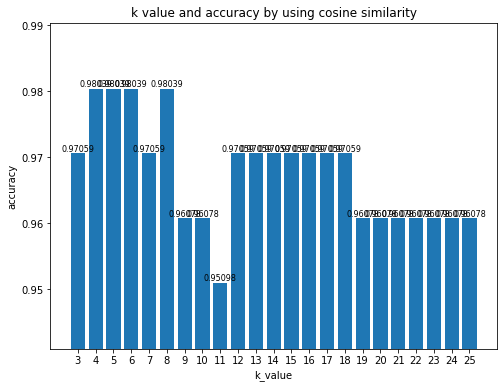

In [71]:
distanceMetric = "cosine similarity"
k_arr = np.arange(3,26,1).tolist()
cs_accuracy,cs_k_best,cs_acc_best=getAccuracyByK(x_dev,x_dev,y_dev,y_dev,k_arr)
print("When using " + distanceMetric + "optimal hyperparameters k is " + str(cs_k_best))
plotAccuracy(cs_acc_best,k_arr,cs_accuracy,distanceMetric)

# Compared hyperparameters

In [72]:
ed_acc_mean=np.mean(ed_accuracy)
ned_acc_mean=np.mean(ned_accuracy)
cs_acc_mean=np.mean(cs_accuracy)
best_hyperparameters = ed_acc_mean
distance_metric_best = "euclidean distance"
k_best = ed_k_best

if ned_acc_mean > best_hyperparameters:
    best_hyperparameters = ed_acc_mean
    distance_metric_best = "normalized euclidean distance"
    k_best = ned_k_best
if cs_acc_mean > best_hyperparameters:
    best_hyperparameters = cs_acc_mean
    distance_metric_best = "cosine similarity"
    k_best = cs_k_best
    
print("optimal hyperparameters: " + "distance metric is " + distance_metric_best + "; k is " + str(k_best))

optimal hyperparameters: distance metric is cosine similarity; k is 4


# d.Using the test dataset

When using optimal hyperparameters:distance metric is cosine similarity&k is 4
The final accuracy is :1.0


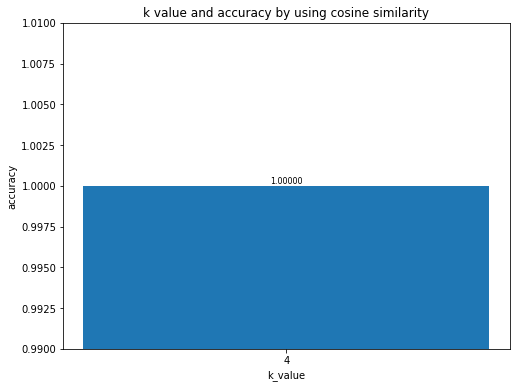

In [74]:
distanceMetric = distance_metric_best
k_arr = []
k_arr.append(k_best)
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_test,y_dev,y_test,k_arr)
print("When using optimal hyperparameters:distance metric is " + distanceMetric + "&k is " + str(k_best))
print("The final accuracy is :" + str(acc_best))
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

# Because randomly divide the dataset, the final accuracy may fluctuate(If the loadDataset function is run again).

## Using the test dataset When using Using euclidean distance

When using euclidean distance&best k is 4
The final euclidean distance accuracy is :0.9791666666666666


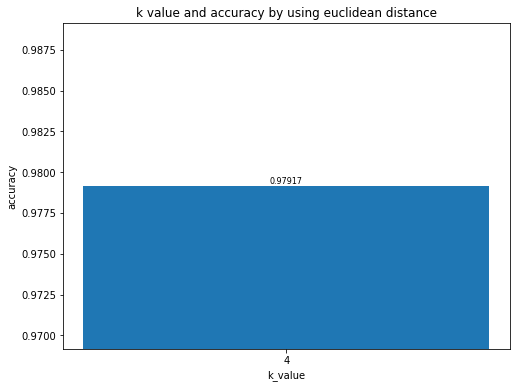

In [82]:
distanceMetric = "euclidean distance"
k_arr = []
k_arr.append(ed_k_best)
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_test,y_dev,y_test,k_arr)
print("When using " + distanceMetric + "&best k is " + str(ed_k_best))
print("The final " + distanceMetric + " accuracy is :" + str(acc_best))
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

## Using the test dataset When using Using normalized euclidean distance

When using normalized euclidean distance&best k is 4
The final normalized euclidean distance accuracy is :0.9791666666666666


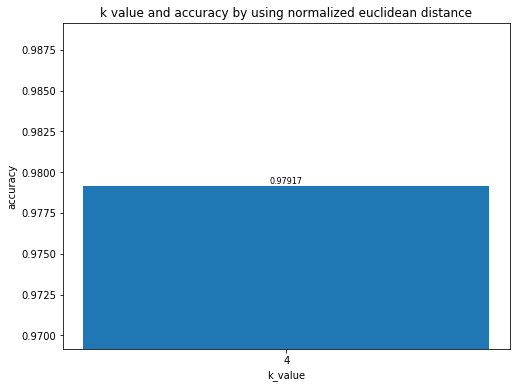

In [83]:
distanceMetric = "normalized euclidean distance"
k_arr = []
k_arr.append(ned_k_best)
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_test,y_dev,y_test,k_arr)
print("When using " + distanceMetric + "&best k is " + str(ned_k_best))
print("The final " + distanceMetric + " accuracy is :" + str(acc_best))
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)

## Using the test dataset When using Using cosine similarity

When using cosine similarity&best k is 4
The final cosine similarity accuracy is :1.0


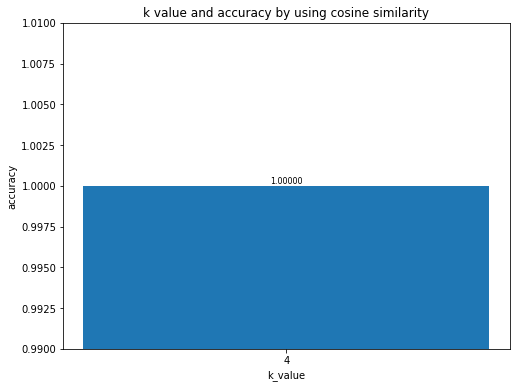

In [84]:
distanceMetric = "cosine similarity"
k_arr = []
k_arr.append(cs_k_best)
accuracy,k_best,acc_best=getAccuracyByK(x_dev,x_test,y_dev,y_test,k_arr)
print("When using " + distanceMetric + "&best k is " + str(cs_k_best))
print("The final " + distanceMetric + " accuracy is :" + str(acc_best))
plotAccuracy(acc_best,k_arr,accuracy,distanceMetric)